In [1]:
import kex_data
import kex_headers

In [2]:
limo_dset, _ = kex_data.listmode()

In [3]:
limo_dset = [v[:100*1000] for v in limo_dset] # subset for testing

In [4]:
import petlink

In [5]:
shape=kex_headers.HISTOGRAM_SHAPE
toflor_dset = [petlink.get_tof_lor_bins(petlink.get_events(limo), shape) for limo in limo_dset]

In [6]:
delay_toflor = [ toflor[:,toflor[0] == 13] for toflor in toflor_dset]

In [7]:
import representation

In [8]:
delay_image_points = [representation.get_img_bins2(toflor) for toflor in delay_toflor] 
print(delay_image_points[0].shape)
print(delay_image_points[0].dtype)

(3, 12565)
float64


In [9]:
import listmode as LM

In [10]:
img_shape = kex_headers.IMAGE_SHAPE
delay_is_fov = [LM.is_fov(points, img_shape) for points in delay_image_points]
images = [LM.get_histogram(points[:, is_fov], img_shape) for points, is_fov  in zip(delay_image_points, delay_is_fov)]

In [11]:
import volume_view as vv
import importlib
importlib.reload(vv)
import visual

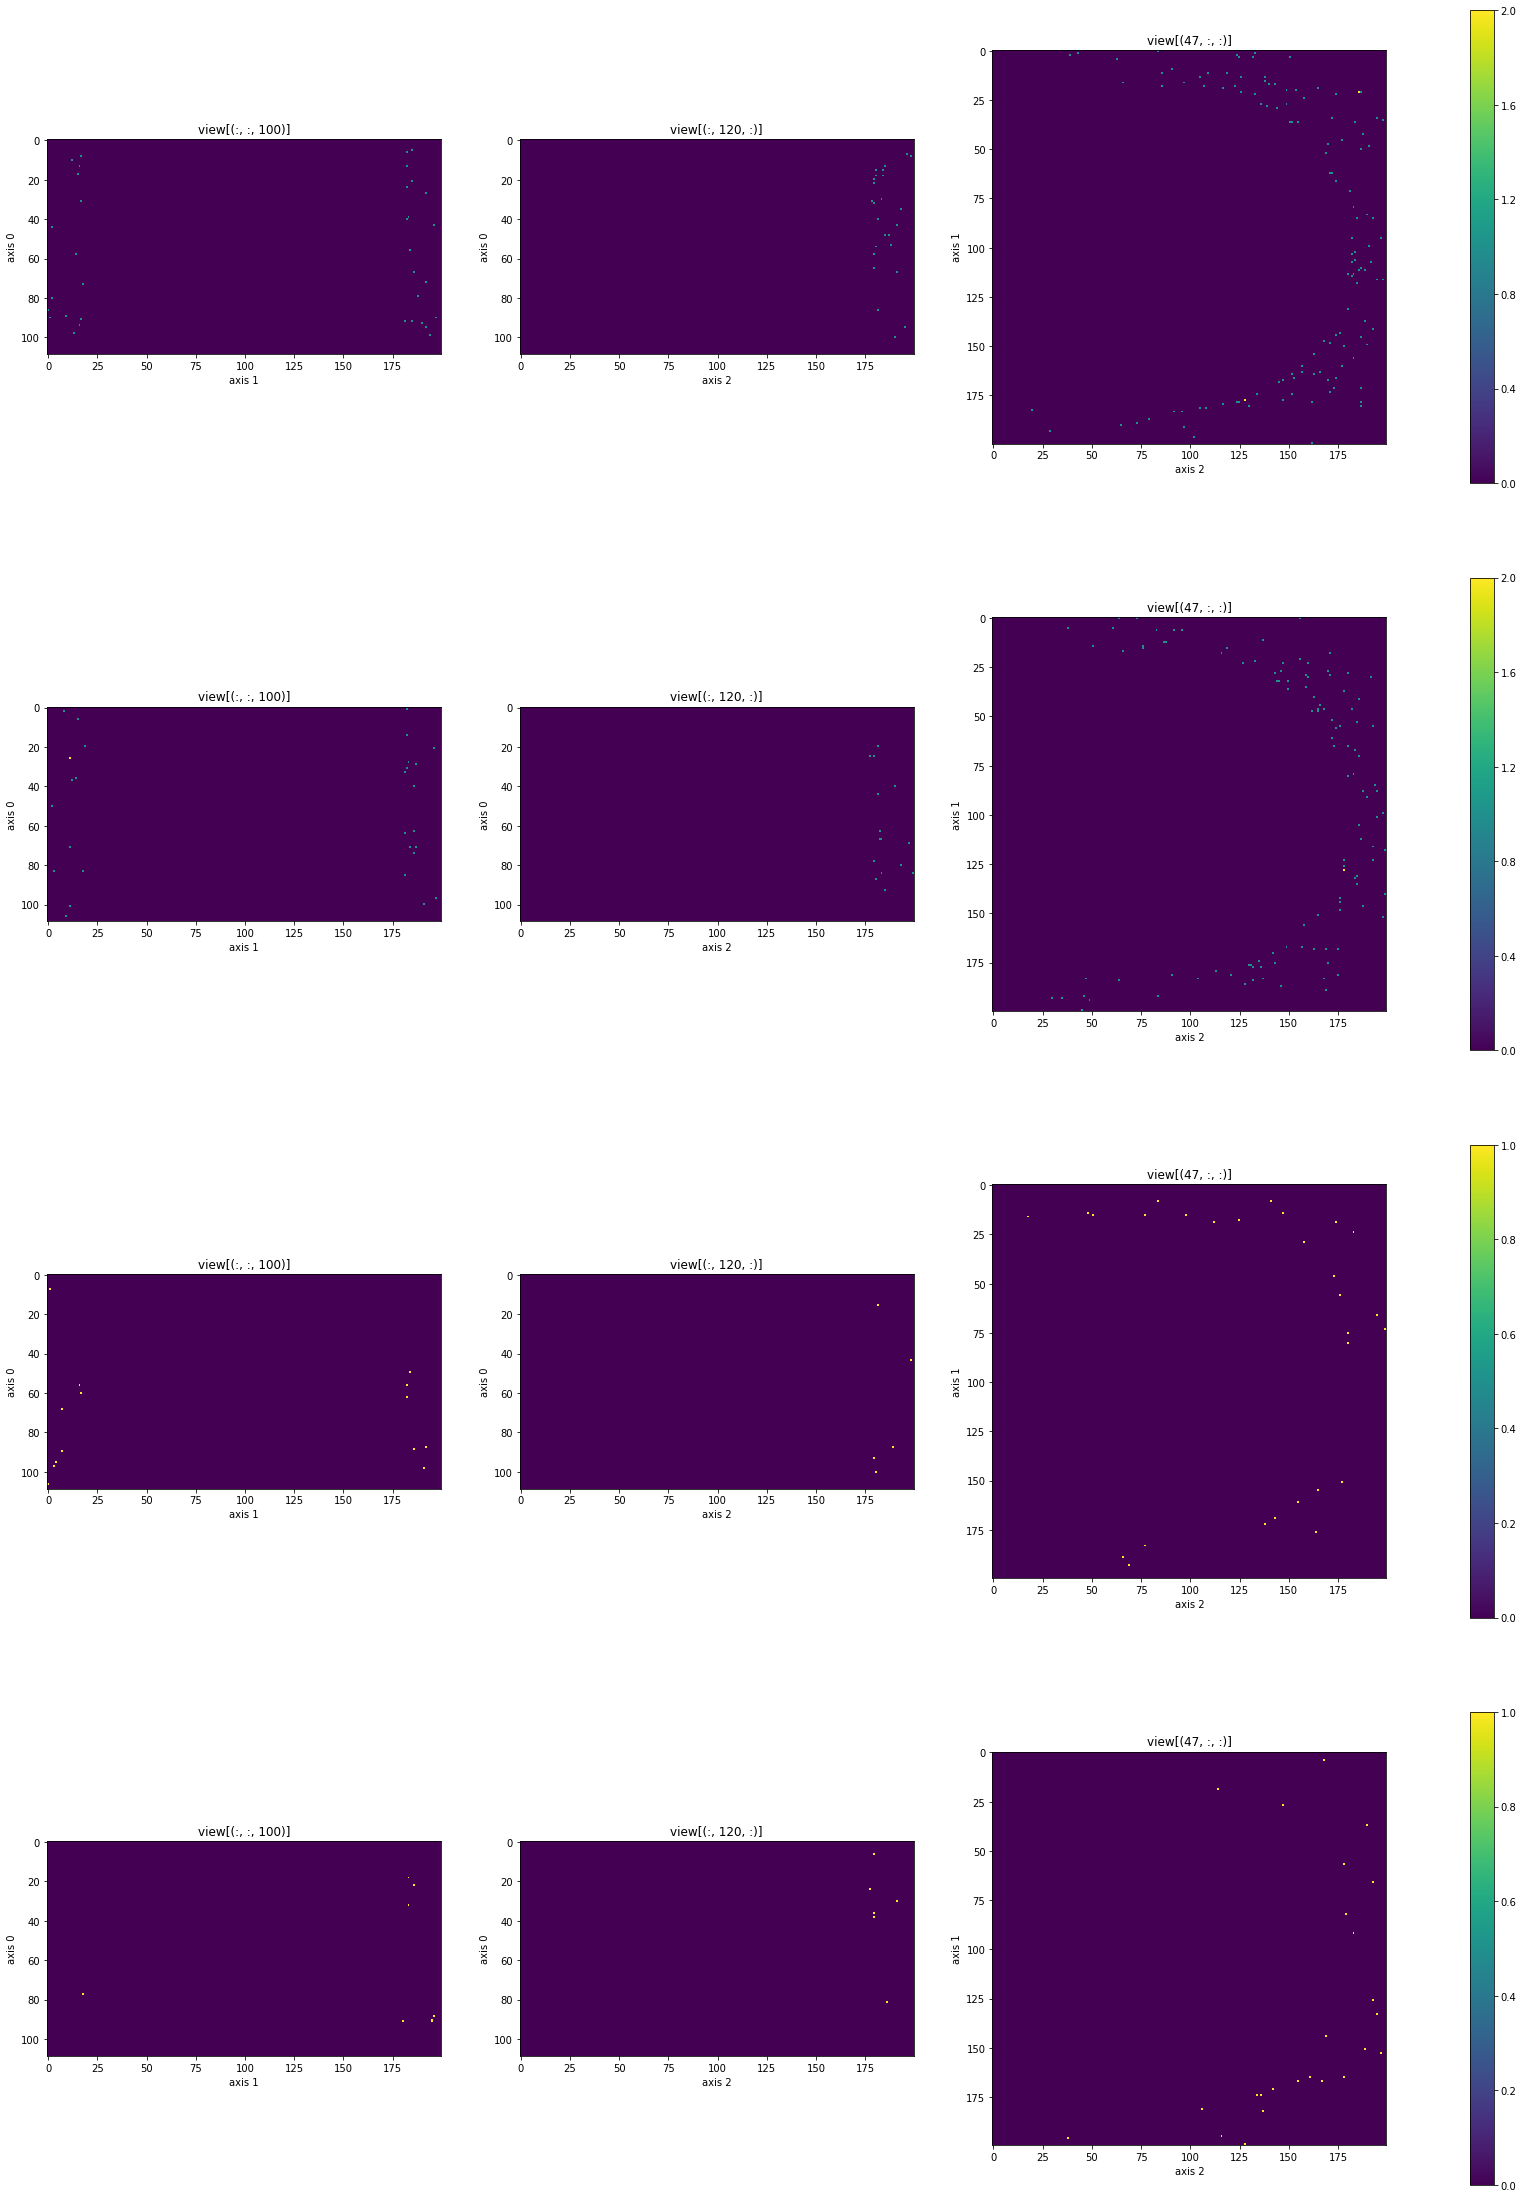

In [12]:
fig, rows = vv.setup_fig_axes(images)
for image, row in zip(images, rows):
    views = vv.plot_views(image, position=[47,120,100], axes=row)
    visual.same_colorbar(fig, views, row)

In [14]:
moved_toflor, is_fov = representation.move_translation(delay_toflor[0], translation=[0,0,-500])
fov_moved_toflor = moved_toflor[:, is_fov]
import numpy as np
print(np.sum(is_fov))

5189


In [15]:
moved_image_points = representation.get_img_bins2(fov_moved_toflor)

In [16]:
shape =kex_headers.IMAGE_SHAPE
is_image_fov = LM.is_fov(moved_image_points, shape)
moved_image = LM.get_histogram(moved_image_points[:, is_image_fov], shape)

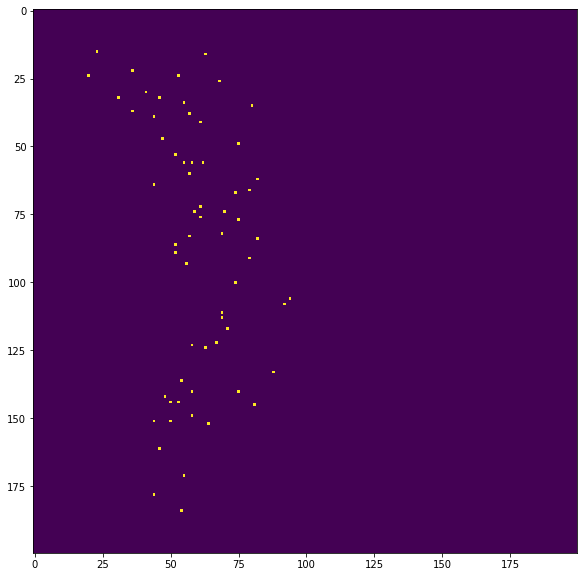

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(moved_image[50])

In [112]:
import numpy as np
importlib.reload(representation)
moved_toflor2, is_fov = representation.move_translation_projection(delay_toflor[0], [0,0,0], verbose=True)
fov_moved_toflor = moved_toflor[:, is_fov]

print(np.sum(is_fov))
print(len(is_fov))

einsum subscripts ijn,j->in
diff sum rm = 0.0
diff sum rd = -8.029132914089132e-13
diff sum tx = 0.0
diff sum ro = 0.0
diff sum tof = 0.0
diffs rd = [7.10542736e-15 0.00000000e+00 2.84217094e-14 ... 7.10542736e-15
 0.00000000e+00 0.00000000e+00]
unique rd_a = [-178 -133  -89  -44    0   44   89  133  178]
unique rd_b = [-178 -133  -89  -44    0   44   89  133  178]
12565
12565


In [113]:
print(moved_toflor2[:,:2])
print("\n",delay_toflor[0][:, :2])

[[ 13  13]
 [121 536]
 [ 63  60]
 [218 281]]

 [[ 13  13]
 [121 536]
 [ 63  60]
 [218 281]]


In [114]:
diff = delay_toflor[0]- moved_toflor2
print(np.sum(diff))
print(diff[:, :5])

0
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


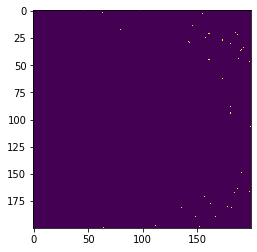

In [115]:
image_points = representation.get_img_bins2(moved_toflor2[:, is_fov])


is_img_fov = LM.is_fov(image_points, kex_headers.IMAGE_SHAPE)
img = LM.get_histogram(image_points[:,is_img_fov], kex_headers.IMAGE_SHAPE)
plt.imshow(img[0])

In [72]:
import representation
R = 30
ro = 11
tx = 0.25
rd_a = 5
cos_ax, sin_ax = representation.get_cos_sin_ax(radius=R, ro=ro, rd=rd_a)
rd_b = representation.get_rd(ro=ro, radius=R, cos_ax=cos_ax, sin_ax=sin_ax)
print(rd_b)

5.0
